In [1]:
import random
import matplotlib.pyplot as plt

# Parameters
total_simulations = 100_000
total_doors = 8
doors_monty_opens = 5

# Counters
stay_wins = 0
switch_wins = 0

for _ in range(total_simulations):
    doors = list(range(total_doors))
    car_door = random.choice(doors)
    player_choice = random.choice(doors)

    # Monty opens doors that are not player's choice and not the car
    monty_candidates = [d for d in doors if d != player_choice and d != car_door]
    monty_opens = random.sample(monty_candidates, doors_monty_opens)

    # Remaining doors after Monty opens
    remaining_doors = [d for d in doors if d not in monty_opens]
    assert len(remaining_doors) == total_doors - doors_monty_opens

    # Strategy 1: Stay
    if player_choice == car_door:
        stay_wins += 1

    # Strategy 2: Switch to one of the other two remaining doors
    switch_options = [d for d in remaining_doors if d != player_choice]
    switch_choice = random.choice(switch_options)
    if switch_choice == car_door:
        switch_wins += 1

# Calculate probabilities
stay_prob = stay_wins / total_simulations
switch_prob = switch_wins / total_simulations

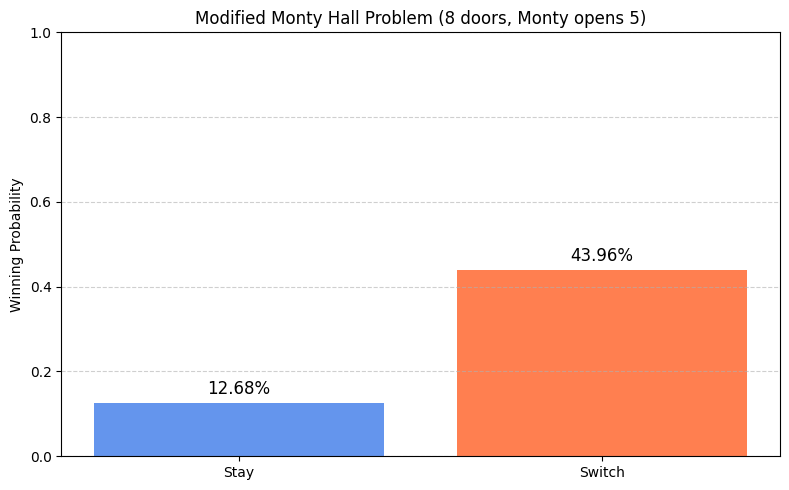

In [2]:
# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(['Stay', 'Switch'], [stay_prob, switch_prob], color=['cornflowerblue', 'coral'])
plt.ylabel('Winning Probability')
plt.title('Modified Monty Hall Problem (8 doors, Monty opens 5)')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Annotate bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{yval:.2%}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

In [3]:
# Print probabilities
print(f"Stay strategy winning probability: {stay_prob:.4f}")
print(f"Switch strategy winning probability: {switch_prob:.4f}")

Stay strategy winning probability: 0.1268
Switch strategy winning probability: 0.4396
